## Exploratory data Analysis using Pandas

* Pandas is one of the most useful data analysis library in Python (I know these names sounds weird, but hang on!). They have been instrumental in increasing the use of Python in data science community. 
* We will now use Pandas to read a data set, perform exploratory analysis and build our first basic categorization algorithm for solving this problem.

### Two important  Datastructures in Pandas
#### 1. Series
#### 2. DataFrames

**Series** can be understood as a 1 dimensional labelled / indexed array. You can access individual elements of this series through these labels.

**dataframe** is similar to Excel workbook – you have column names referring to columns and you have rows, which can be accessed with use of row numbers. The essential difference being that column names and row numbers are known as column and row index, in case of dataframes.

**Series and dataframes** form the core data model for Pandas in Python. The data sets are first read into these dataframes and then various operations (e.g. group by, aggregation etc.) can be applied very easily to its columns.

In [35]:
## Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import  seaborn as sns

#Read Data 
df=pd.read_csv('train.csv')

### Quick Data Exploration

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


This should print 10 rows. Alternately, we can also look at more rows by printing the dataset.

Next, we can look at summary of numerical fields by using describe() function

In [16]:
#DataFrame Quick Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
df.describe()   #Get Summary of Numerical Variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here are a few inferences, you can draw by looking at the output of describe() function:

LoanAmount has (614 – 592) 22 missing values.<br>
Loan_Amount_Term has (614 – 600) 14 missing values.<br>
Credit_History has (614 – 564) 50 missing values.<br>
We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)<br>
**The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome**<br>
Please note that we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.<br>
For the **non-numerical values** (e.g. Property_Area, Credit_History etc.), we can look at **frequency distribution** to understand whether they make sense or not. The frequency table can be printed by following command:

In [13]:
print('Education Categorical Variable values\n',df['Education'].value_counts(),'\n')
print('Property Area Categorical Variable values\n',df['Property_Area'].value_counts())

Education Categorical Variable values
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

Property Area Categorical Variable values
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


### Distribution Analysis

Now that we are familiar with basic data characteristics, let us study distribution of various variables. Let us start with numeric variables – namely ApplicantIncome and LoanAmount

Lets start by plotting the histogram of **ApplicantIncome** using the following commands:

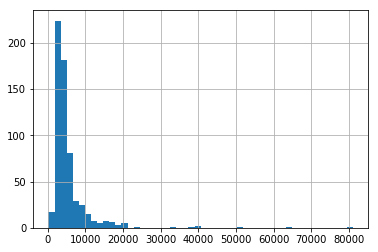

In [38]:
df['ApplicantIncome'].hist(bins=50)

Here we observe that there are few extreme values

Next, we look at **box plots** to understand the distributions. Box plot for fare can be plotted by:

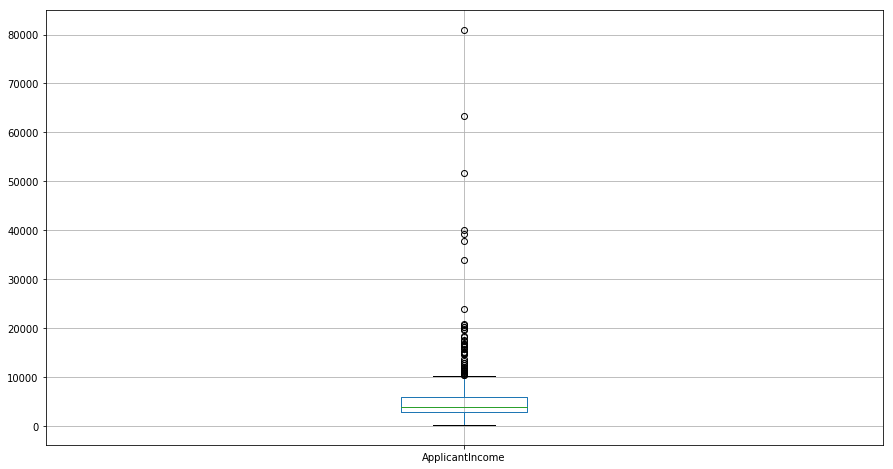

In [44]:
df.boxplot(column='ApplicantIncome',figsize=(15,8))

This confirms the presence of a lot of outliers/extreme values.<br> This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with **different education levels**.<br> Let us segregate them by Education:

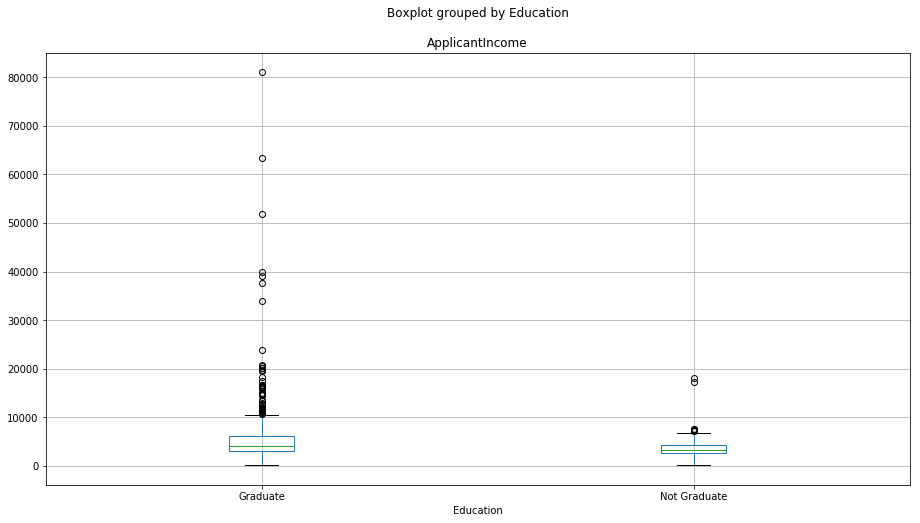

In [48]:
figSize=15,8              # Set Figure Size
df.boxplot(column='ApplicantIncome', by='Education',figsize=figSize)

We can see that there is no substantial different between the mean income of graduate and non-graduates. <br>But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Now, Let’s look at the histogram and boxplot of LoanAmount using the following command:

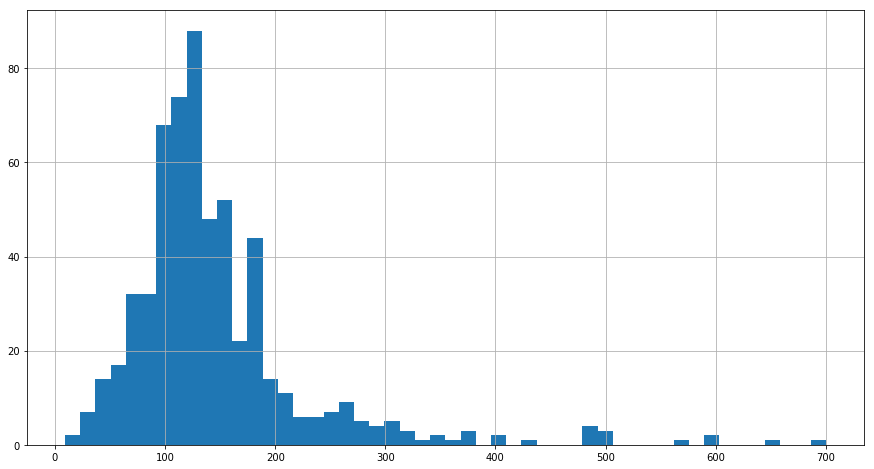

In [49]:
df['LoanAmount'].hist(bins=50, figsize=figSize)

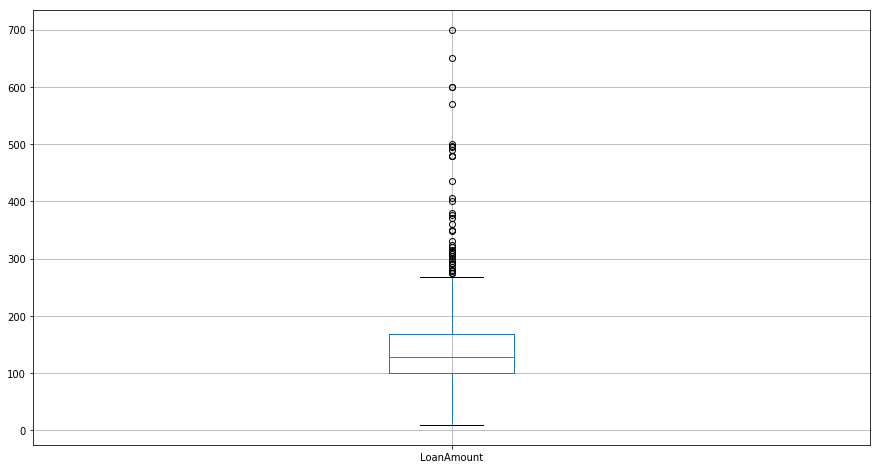

In [50]:
df.boxplot(column='LoanAmount',figsize=figSize)

Again, there are some extreme values. <br>Clearly, both ApplicantIncome and LoanAmount require some amount of data munging.<br> LoanAmount has missing as well as extreme values, while ApplicantIncome has a few extreme values, which demand deeper understanding. <br>We will take this up in coming sections.

### Categorical variable analysis

Now that we understand distributions for ApplicantIncome and LoanIncome.<br> let us understand categorical variables in more details. <br>
**[some useful Data Manipulation Techniques can be found here](https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


#### Pivot Tables

In [54]:
temp1=df['Credit_History'].value_counts(ascending=True)
print('Credit history Frequency table \n',temp1)

Credit history Frequency table 
 0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [58]:
temp2=df.pivot_table(index='Credit_History',values='Loan_Status',aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print ('\nProbility of getting loan for each Credit History class:' )
print (temp2)


Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5,1,'Probability of getting loan by credit history')

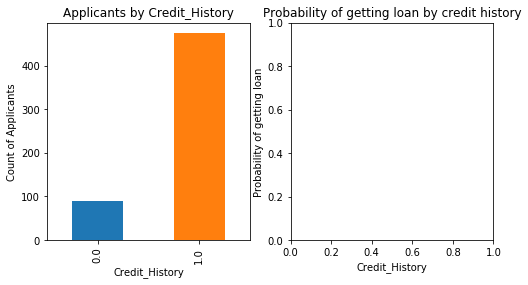

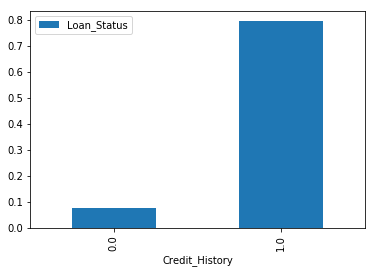

In [66]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2=fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. <br>You can plot similar graphs by Married, Self-Employed, Property_Area, etc.<br>

Alternately, these two plots can also be visualized by combining them in a stacked chart::


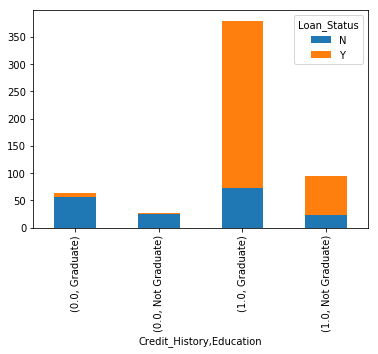

In [73]:
temp3=pd.crosstab(index=[df['Credit_History'],df['Education']],columns=df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, grid=False)

We just saw how we can do exploratory analysis in Python using Pandas.

Next let’s explore ApplicantIncome and LoanStatus variables further, perform data munging and create a dataset for applying various modeling techniques

**[Data Munging Techniques Tutorials Here](https://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/)**

### data Munging in Python

While our exploration of the data, we found a few problems in the data set, which needs to be solved before the data is ready for a good model. This exercise is typically referred as “Data Munging”. Here are the problems, we are already aware of:

There are missing values in some variables. We should estimate those values wisely depending on the amount of missing values and the expected importance of variables.
While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, but should be treated appropriately

In addition to these problems with numerical fields, we should also look at the non-numerical fields i.e. Gender, Property_Area, Married, Education and Dependents to see, if they contain any useful information.

#### Check Missing Values


In [75]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

[Comprehenisve Guide to Data Exploration Link](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)

Though the missing values are not very high in number, but many variables have them and each one of these should be estimated and added in the data.

**Note** Remember that missing values may not always be NaNs. For instance, if the Loan_Amount_Term is 0, does it makes sense or would you consider that missing? I suppose your answer is missing and you’re right. So we should check for values which are unpractical.

#### How to fill missing values in LoanAmount?

There are numerous ways to fill the missing values of loan amount – the simplest being replacement by mean, which can be done by following code:

In [76]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

A key hypothesis is that the whether a person is educated or self-employed can combine to give a good estimate of loan amount.

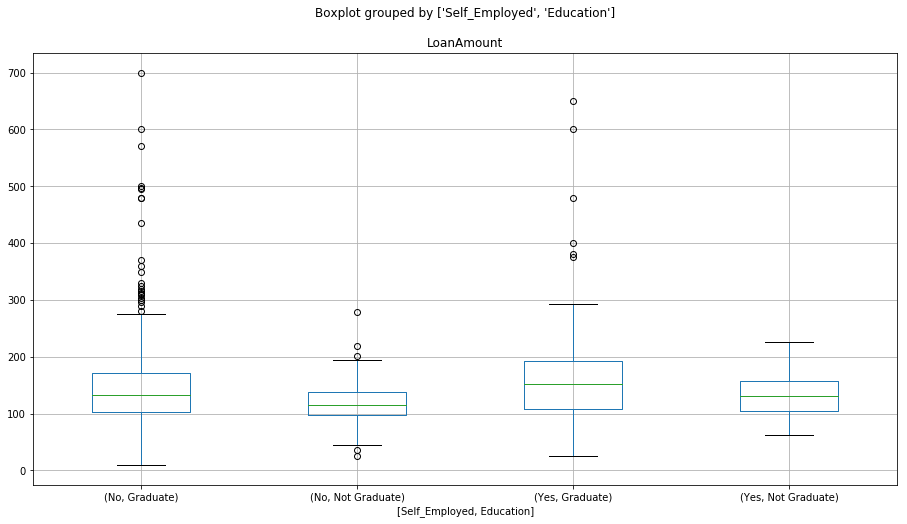

In [83]:
df.boxplot(column='LoanAmount',by=['Self_Employed','Education'],figsize=figSize)

Thus we see some variations in the median of loan amount for each group and this can be used to impute the values. But first, we have to ensure that each of Self_Employed and Education variables should not have a missing values.

As we say earlier, Self_Employed has some missing values. Let’s look at the frequency table:

In [84]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Since ~86% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success. This can be done using the following code:

In [85]:
df['Self_Employed'].fillna(value='No',inplace=True)

In [93]:
table=df.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,131.0,115.0
Yes,152.0,130.0


In [99]:
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['']]

152.0